<a href="https://colab.research.google.com/github/carlos-souza-blip/RMHP/blob/main/RMHP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banco de dados - RMHP, ano 2017.

In [1]:
# importando Bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
from math import sqrt

In [2]:
# Dados de 2017 (RMHP)
df = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/RMHP/main/rmhp_selecao_2017_GO_.csv', sep= ",")
df

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,28,A049,5,2017,1,0,2,0,0,0,0
1,2338262,1,38,F130,13,2017,1,0,4,1,1,0,0
2,2338262,1,86,I743,10,2017,5,0,3,0,0,0,0
3,2338262,3,60,K297,10,2017,3,0,3,0,0,0,0
4,2338262,1,37,K810,2,2017,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925,7743068,3,57,M840,1,2017,2,0,1,0,0,0,0
45926,7743068,3,68,M840,5,2017,3,0,2,0,0,0,0
45927,7743068,1,28,M840,1,2017,1,0,1,0,0,0,0
45928,7743068,1,24,M841,2,2017,1,0,2,0,0,0,0


In [3]:
df['fxidade'].value_counts()

1    24856
2     7202
3     6090
4     4711
5     2540
6      531
Name: fxidade, dtype: int64

### Curva ROC

Encontrando o melhor modelo dentro dos parâmentros da curva ROC, com a finalidade de executar a regressão logística.

In [5]:
modelo_0 = roc_auc_score(df.obito, df.sexo + df.fxidade)
print('Modelo 0 AUC: %0.2f' % modelo_0)
modelo_1 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50)
print('Modelo 1 AUC: %0.2f' % modelo_1)
modelo_2 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
print('Modelo 2 AUC: %0.2f' % modelo_2)
modelo_3 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
print('Modelo 3 AUC: %0.2f' % modelo_3)
modelo_4 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
print('Modelo 4 AUC: %0.2f' % modelo_4)
modelo_5 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
print('Modelo 5 AUC: %0.2f' % modelo_5)
modelo_6 = roc_auc_score(df.obito, df.fxidade + df.cid50 + df.icc + df.ieh + df.permanencia + df.uso_uti)
print('Modelo 6 AUC: %0.2f' % modelo_6)

Modelo 0 AUC: 0.69
Modelo 1 AUC: 0.72
Modelo 2 AUC: 0.72
Modelo 3 AUC: 0.75
Modelo 4 AUC: 0.73
Modelo 5 AUC: 0.77
Modelo 6 AUC: 0.78


In [34]:
# Intervalo de confiança para o modelo 6
intervalo_conf_ROC(df.obito, df.fxidade + df.cid50 + df.icc + df.ieh + df.permanencia + df.uso_uti)

(0.7744343991335527, 0.793793387408718)

In [6]:
# Plotar gráfico
aleatorio = [0 for _ in range(len(df.obito))]
h_fpr, h_tpr, _ = roc_curve(df.obito, aleatorio)

a_fpr, a_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade)
b_fpr, b_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50)
c_fpr, c_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
d_fpr, d_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
e_fpr, e_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
f_fpr, f_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
g_fpr, g_tpr, _ = roc_curve(df.obito, df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)

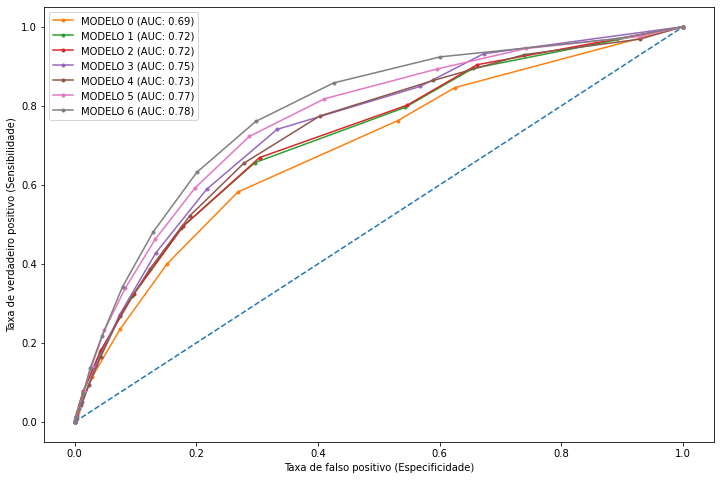

In [8]:
pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )

pyplot.plot(a_fpr, a_tpr, marker='.', label='MODELO 0 (AUC: %0.2f)' % modelo_0)
pyplot.plot(b_fpr, b_tpr, marker='.', label='MODELO 1 (AUC: %0.2f)' % modelo_1)
pyplot.plot(c_fpr, c_tpr, marker='.', label='MODELO 2 (AUC: %0.2f)' % modelo_2)
pyplot.plot(d_fpr, d_tpr, marker='.', label='MODELO 3 (AUC: %0.2f)' % modelo_3)
pyplot.plot(e_fpr, e_tpr, marker='.', label='MODELO 4 (AUC: %0.2f)' % modelo_4)
pyplot.plot(f_fpr, f_tpr, marker='.', label='MODELO 5 (AUC: %0.2f)' % modelo_5)
pyplot.plot(g_fpr, g_tpr, marker='.', label='MODELO 6 (AUC: %0.2f)' % modelo_6)

pyplot.xlabel('Taxa de falso positivo (Especificidade)')
pyplot.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
pyplot.legend()
pyplot.rcParams['figure.figsize'] = [12, 8]

pyplot.show()

Logo, o melhor modelo para aplicar a regressão logística é o modelo_6. Pois nela, saberamos os óbitos esperados.

In [9]:
# Organizando as variáveis conforme o modelo 6
dados = df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
dados.head(3)

,fxidade,cid50,ieh,icc,permanencia,uso_uti
0,1,0,0,0,2,0
1,1,0,0,0,4,1
2,5,0,0,0,3,0


In [10]:
df['obito'].value_counts()

0    42789
1     3141
Name: obito, dtype: int64

# Aplicando a Regressão Logística

In [11]:
# Separando os Dados para teste e treino
# Iremos trabalhar com os dados de treino para verificar o modelo de regressão com 0,7% dos dados separados
y = df.obito
X = pd.get_dummies(df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)

In [12]:
y_train.value_counts()

0    29974
1     2177
Name: obito, dtype: int64

In [13]:
reg_logistica = LogisticRegression()
reg_logistica.fit(X_train, y_train)
y_predict = reg_logistica.predict(X_train)

In [14]:
print('Coeficientes:', reg_logistica.coef_)
print('Intercepto: %0.2f' %reg_logistica.intercept_)
print('R-squared: %0.2f' %reg_logistica.score(X_train, y_train))
print('Acurácia: %0.2f' %accuracy_score(y_train, reg_logistica.predict(X_train)))
print('Erro: %0.2f' %sqrt(mean_squared_error(y_train, y_predict)))

Coeficientes: [[ 0.45770354  1.09244614  0.3561526   0.28421522 -0.35691218  2.90000178]]
Intercepto: -4.08
R-squared: 0.94
Acurácia: 0.94
Erro: 0.25


In [15]:
print(classification_report(y_train, reg_logistica.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29974
           1       0.59      0.24      0.34      2177

    accuracy                           0.94     32151
   macro avg       0.77      0.61      0.65     32151
weighted avg       0.92      0.94      0.92     32151



In [16]:
# Matriz de confusão
confusion_matrix = pd.crosstab(y_train, y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,29610,364
1,1659,518


In [17]:
obito_esp = reg_logistica.predict_proba(X_train)[:,1]
obito_esp

array([0.15602353, 0.00906695, 0.01290568, ..., 0.01290568, 0.01833954,
       0.01833954])

In [18]:
# Intervalo de Confiança - Curva ROC (depois da regressão)
def intervalo_conf_ROC(y_true, y_score):
    curva_roc = roc_auc_score(y_true, y_score)
    qtd = sum(y_true == 1)
    qtd_ = sum(y_true == 0)
    x = curva_roc / (2 - curva_roc)
    y = 2*curva_roc**2 / (1 + curva_roc)
    RQ = sqrt((curva_roc*(1 - curva_roc) + (qtd - 1)*(x - curva_roc**2) + (qtd_ - 1)*(y - curva_roc**2)) / (qtd*qtd_))
    lower = curva_roc - 1.96*RQ
    upper = curva_roc + 1.96*RQ

    return (lower, upper)
intervalo_conf_ROC(y_train, obito_esp)

(0.8727447390074485, 0.8914448745357422)

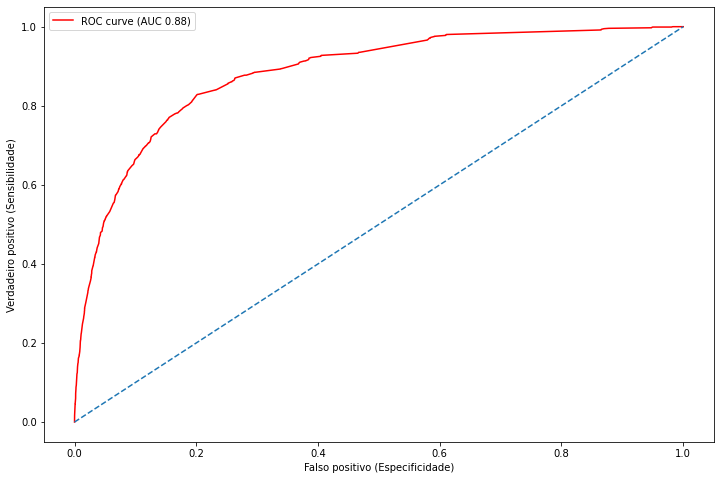

In [19]:
def pyplot_plot(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score)
  pyplot.rcParams['figure.figsize'] = [11, 7]
  curve = roc_auc_score(y_true, y_score)
  pyplot.plot(fpr, tpr, color='red', label='ROC curve (AUC %0.2f)' % curve)
  pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )
  pyplot.xlabel('Falso positivo (Especificidade)') 
  pyplot.ylabel('Verdadeiro positivo (Sensibilidade)')
  pyplot.legend()
  pyplot.show()

pyplot_plot(y_train, obito_esp)

# Testando o modelo para o banco de dados inteiro

In [20]:
dados_1 = reg_logistica.predict_proba(dados)[:,1]
print('Somatório dos óbitos esperados %0.0f' % dados_1.sum())

Somatório dos óbitos esperados 3109


In [21]:
# óbitos observados (óbito = 1 e não óbito = 0)
df['obito'].value_counts()

0    42789
1     3141
Name: obito, dtype: int64

In [22]:
# Calculando a taxa, somatória dos obitos observados / somatória dos óbitos esperados
Razao = 3141 / 3109
print('Obtivemos uma taxa de assistência hospitalar de %0.2f' % Razao)

Obtivemos uma taxa de assistência hospitalar de 1.01


Usando o modelo da regressão logística já treinado, obtivemos com exatidão por meio da função (predict_proba), cujo comando calcula a chance de cada individuo morrer com tais parâmetros aplicados. Para saber o número esperado de morte, é a somatória das probabilidades preditas.

# Série Histórica (2014 - 2020)

In [23]:
dataset = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/RMHP/main/rmhp_selecao_GO_SH.csv', sep=",")
dataset.head(5)

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,75,A318,4,2014,4,1,2,0,0,0,0
1,2338262,1,40,A480,1,2014,1,0,1,0,0,0,0
2,2338262,1,76,B873,3,2014,4,0,2,0,0,0,0
3,2338262,3,30,A419,11,2014,1,1,4,0,0,0,0
4,2338262,1,38,A480,3,2014,1,0,2,0,0,0,0


In [ ]:
# Salvar a base de dados
#dataset.to_csv('rmhp_selecao_GO_SH.csv')

In [25]:
# Separado os anos;
# Aplicando o modelo 6, segundo a curva ROC.
sh14 = dataset.loc[dataset['ano'] == 2014]
sh14 = sh14[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh15 = dataset.loc[dataset['ano'] == 2015]
sh15 = sh15[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh16 = dataset.loc[dataset['ano'] == 2016]
sh16 = sh16[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh17 = dataset.loc[dataset['ano'] == 2017]
sh17 = sh17[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh18 = dataset.loc[dataset['ano'] == 2018]
sh18 = sh18[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh19 = dataset.loc[dataset['ano'] == 2019]
sh19 = sh19[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh20 = dataset.loc[dataset['ano'] == 2020]
sh20 = sh20[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]

In [26]:
# Tabela de Contigência 2x2
dataset.groupby('ano')['obito'].value_counts() 

ano   obito
2014  0        33295
      1         2387
2015  0        36886
      1         2707
2016  0        38934
      1         3045
2017  0        42789
      1         3141
2018  0        48512
      1         3440
2019  0        51536
      1         3817
2020  0        42443
      1         3728
Name: obito, dtype: int64

In [27]:
sh14_ = reg_logistica.predict_proba(sh14)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh14_.sum(), 'em 2014.')
sh15_ = reg_logistica.predict_proba(sh15)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh15_.sum(), 'em 2015.')
sh16_ = reg_logistica.predict_proba(sh16)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh16_.sum(), 'em 2016.')
sh17_ = reg_logistica.predict_proba(sh17)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh17_.sum(), 'em 2017.')
sh18_ = reg_logistica.predict_proba(sh18)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh18_.sum(), 'em 2018.')
sh19_ = reg_logistica.predict_proba(sh19)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh19_.sum(), 'em 2019.')
sh20_ = reg_logistica.predict_proba(sh20)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh20_.sum(), 'em 2020.')

Somatória dos óbitos esperados 2170 em 2014.
Somatória dos óbitos esperados 2449 em 2015.
Somatória dos óbitos esperados 2752 em 2016.
Somatória dos óbitos esperados 3109 em 2017.
Somatória dos óbitos esperados 3795 em 2018.
Somatória dos óbitos esperados 4192 em 2019.
Somatória dos óbitos esperados 3550 em 2020.


In [28]:
razao14 = 2387 / 2170
print('Obtivemos uma taxa de assistência hospitalar em 2014 de %0.2f' % razao14)
razao15 = 2707 / 2449
print('Obtivemos uma taxa de assistência hospitalar em 2015 de %0.2f' % razao15)
razao16 = 3045 / 2752
print('Obtivemos uma taxa de assistência hospitalar em 2016 de %0.2f' % razao16)
razao17 = 3141 / 3109
print('Obtivemos uma taxa de assistência hospitalar em 2017 de %0.2f' % razao17)
razao18 = 3440 / 3795
print('Obtivemos uma taxa de assistência hospitalar em 2018 de %0.2f' % razao18)
razao19 = 3817 / 4192
print('Obtivemos uma taxa de assistência hospitalar em 2019 de %0.2f' % razao19)
razao20 = 3728 / 3550
print('Obtivemos uma taxa de assistência hospitalar em 2020 de %0.2f' % razao20)

Obtivemos uma taxa de assistência hospitalar em 2014 de 1.10
Obtivemos uma taxa de assistência hospitalar em 2015 de 1.11
Obtivemos uma taxa de assistência hospitalar em 2016 de 1.11
Obtivemos uma taxa de assistência hospitalar em 2017 de 1.01
Obtivemos uma taxa de assistência hospitalar em 2018 de 0.91
Obtivemos uma taxa de assistência hospitalar em 2019 de 0.91
Obtivemos uma taxa de assistência hospitalar em 2020 de 1.05


In [29]:
taxa = [1.10, 1.08, 1.08, 1.00, 0.92, 0.93, 1.08]
ano = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
linha = [1, 1, 1, 1, 1, 1, 1]

In [30]:
# Plotar gráfico interativo
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

trace = go.Scatter(x = ano, y = linha, mode = "lines", name = "RMHP",
                    marker = dict(color = 'blue'), text= "Margem")

trace1 = go.Scatter(x = ano, y = taxa, mode = "lines+markers", name = "Taxa RMHP",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace, trace1]

layout = dict(title = 'RMHP - Série Histórica, período: 2014 - 2020',
              xaxis= dict( title = 'ANO', ticklen=30, zeroline= False),
              yaxis = dict(title = 'Taxa', ticklen=30, zeroline= False ))

fig = dict(data = data, layout = layout)

py.iplot(fig)

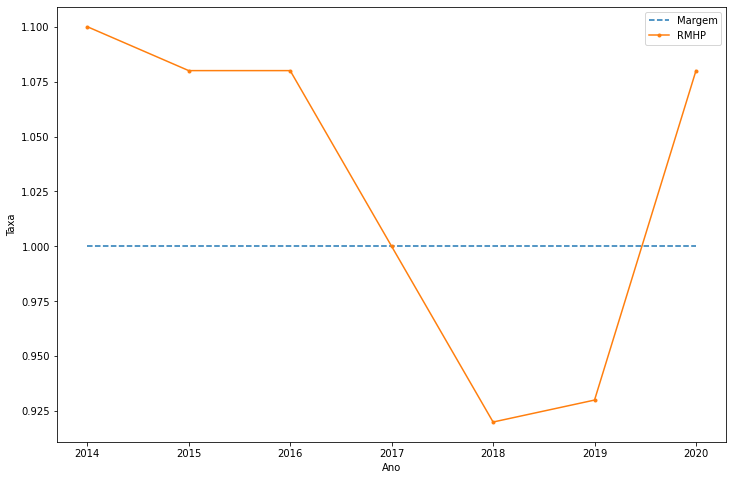

In [35]:
pyplot.plot(ano, linha, linestyle='--', label='Margem')
pyplot.plot(ano, taxa, marker='.', label='RMHP')

pyplot.xlabel('Ano')
pyplot.ylabel('Taxa')
pyplot.legend()
pyplot.rcParams['figure.figsize'] = [12, 8]

# Salvar o grafico como imagem
#pyplot.savefig('RMHP_Taxa', format = 'png')

pyplot.show()